# Simple Linear Regression using `NumPy`

## Imports

In [274]:
# Add the magic command for resetting the notebook state.
%reset -f

In [275]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ADVERTISING_DATA = 'https://raw.githubusercontent.com/SimeonHristov99/ML_23-24/main/DATA/Advertising.csv'

# Task 1

## Load Data

- This sample data is from the lectures. It displays sales (in thousands of units) for a particular product as a function of advertising budgets (in thousands of dollars) for TV, radio, and newspaper media.
- Load the dataset from [here](https://github.com/SimeonHristov99/ML_23-24/blob/main/DATA/Advertising.csv). Place the link in the `Imports` section.

In [276]:
df_advertising = pd.read_csv(ADVERTISING_DATA)
df_advertising

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


## Feature engineering

Create a new column `total_spend` which is the sum of the money spent on `TV`, `radio` and `newspaper`.

In [277]:
df_advertising['total_spend'] = df_advertising['TV'] + df_advertising['radio'] + df_advertising['newspaper']
df_advertising

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0
...,...,...,...,...,...
195,38.2,3.7,13.8,7.6,55.7
196,94.2,4.9,8.1,9.7,107.2
197,177.0,9.3,6.4,12.8,192.7
198,283.6,42.0,66.2,25.5,391.8


## Exploratory data analysis

**Is there a relationship between `total_spend` advertising spend and `sales`?**

Using the `scatterplot` function from `seaborn` plot the relationship between those two features.

> ***Hint***: to see the docstring directly, type `help(sns.scatterplot)` in a cell.

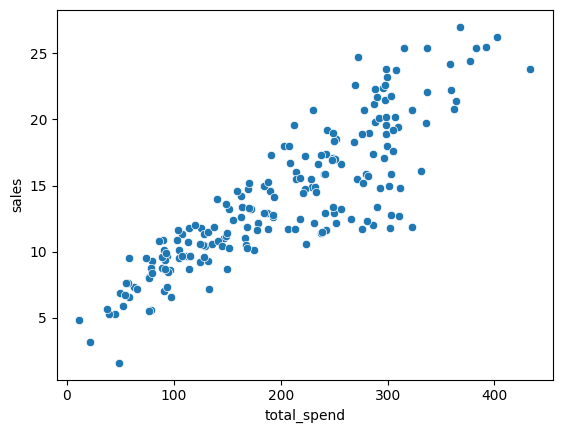

In [278]:
sns.scatterplot(x='total_spend',y='sales',data=df_advertising);

# Task 2

## Least Squares Line

**Understanding what a line of best fit answers:** *If someone was to spend a total of $200 , what would the expected sales be?*

We have simplified this quite a bit by combining all the features into "total spend", but we will come back to individual features later on. For now, let's focus on understanding what a linear regression line can help answer.

Using the `regplot` function from `seaborn` plot the best fitting line.

It is this line that we want to be able to create ourselves.

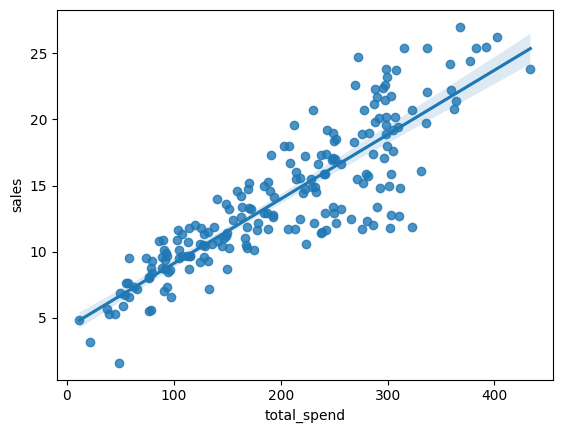

In [279]:
sns.regplot(x='total_spend',y='sales',data=df_advertising);

Let's go ahead and start solving!

Split the data into `X` and `y`. `X` will represent the features our model will accept and `y` will represent the ground-truth value.

In [280]:
X = df_advertising['total_spend']
y = df_advertising['sales']

In [281]:
X

0      337.1
1      128.9
2      132.4
3      251.3
4      250.0
       ...  
195     55.7
196    107.2
197    192.7
198    391.8
199    249.4
Name: total_spend, Length: 200, dtype: float64

In [282]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Create an instance of the `np.polynomial.Polynomial` class. Name it `polynomial` and:
1. Print the docstring of its `.fit` method;
2. Print the docstring of its `.convert` method.

In [283]:
polynomial = np.polynomial.Polynomial
help(polynomial.fit)

Help on method fit in module numpy.polynomial._polybase:

fit(x, y, deg, domain=None, rcond=None, full=False, w=None, window=None, symbol='x') method of abc.ABCMeta instance
    Least squares fit to data.
    
    Return a series instance that is the least squares fit to the data
    `y` sampled at `x`. The domain of the returned instance can be
    specified and this will often result in a superior fit with less
    chance of ill conditioning.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,)
        y-coordinates of the M sample points ``(x[i], y[i])``.
    deg : int or 1-D array_like
        Degree(s) of the fitting polynomials. If `deg` is a single integer
        all terms up to and including the `deg`'th term are included in the
        fit. For NumPy versions >= 1.11.0 a list of integers specifying the
        degrees of the terms to include may be used instead.
    doma

In [284]:
help(polynomial.convert)

Help on function convert in module numpy.polynomial._polybase:

convert(self, domain=None, kind=None, window=None)
    Convert series to a different kind and/or domain and/or window.
    
    Parameters
    ----------
    domain : array_like, optional
        The domain of the converted series. If the value is None,
        the default domain of `kind` is used.
    kind : class, optional
        The polynomial series type class to which the current instance
        should be converted. If kind is None, then the class of the
        current instance is used.
    window : array_like, optional
        The window of the converted series. If the value is None,
        the default window of `kind` is used.
    
    Returns
    -------
    new_series : series
        The returned class can be of different type than the current
        instance and/or have a different domain and/or different
        window.
    
    Notes
    -----
    Conversion between domains and class types can result in
 

# Task 3

Fit a first degree polynomial to `X` using `y`. Save the fitted polynomial in `best_line`. Print `best_line`.

In [285]:
best_line = polynomial.fit(X,y,1).convert()
best_line

Polynomial([4.24302822, 0.04868788], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Create a 100 evenly spaced numbers between 0 and 500. Save them in a variable called `potential_spend`.

In [286]:
# Potential Future Spend Budgets
potential_spend = np.linspace(0,500,100)
potential_spend

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

Use `best_line` to get the predicted sales for the created `potential_spend`. Plot the obtained line.

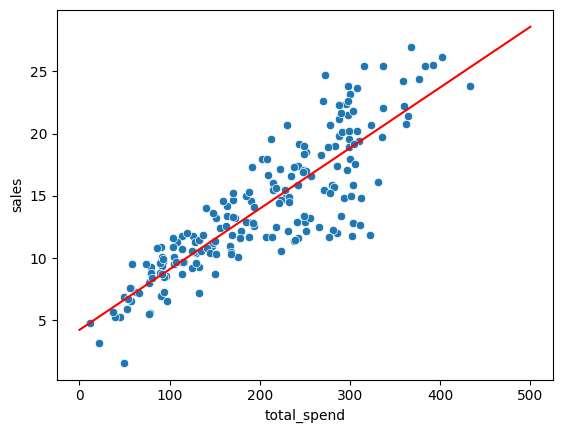

In [287]:
predicted_sales = best_line(potential_spend)
sns.scatterplot(x='total_spend',y='sales',data=df_advertising)
plt.plot(potential_spend,predicted_sales,color='red');

Answer programmatically the following question: **Our next ad campaign will have a total spend of $200, how many units do we expect to sell as a result of this?**

In [288]:
spend = 200
best_line(spend)

13.98060407984595

# Task 4

## Overfitting, Underfitting, and Measuring Performance

So far, we've created first degree polynomials. We can begin to explore higher orders, but does higher order mean an overall better fit? Is it possible to fit too much? Too little? How would we know and how do we even define a good fit?

Create a third degree polynomial and save it in a variable called `best_line_deg3`.

In [289]:
best_line_deg3 = polynomial.fit(X,y,3).convert()
best_line_deg3

Polynomial([ 2.70495053e+00,  8.20886302e-02, -1.89392449e-04,  3.07615033e-07], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')

Use `best_line_deg3` to get the predicted sales for the created `potential_spend`. Plot the obtained line.

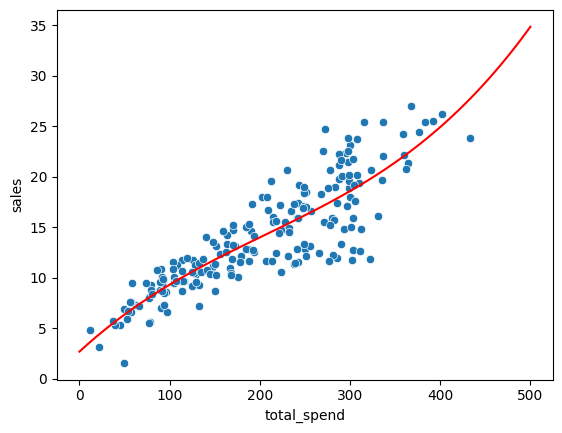

In [290]:
predicted_sales = best_line_deg3(potential_spend)
sns.scatterplot(x='total_spend',y='sales',data=df_advertising)
plt.plot(potential_spend,predicted_sales,color='red');

## Multiple Features

The real data had 3 features. Would using them lead to a more accurate result?

Split the dataset into `X` and `y` where `X` contains all original features.

In [291]:
X = df_advertising[['TV','radio','newspaper']]
y = df_advertising['sales']

In [292]:
X

,TV,radio,newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [293]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: sales, Length: 200, dtype: float64

Create a first degree polynomial using the three features.

In [294]:
np.polyfit(X,y,1)

TypeError: expected 1D vector for x

**Uh oh! Polyfit only works with a 1D `X` array! We'll need to move on to a more powerful library...**